In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression

import torch
from startorch import example
from startorch.utils.seed import get_torch_generator
from startorch.plot.matplotlib import hist_feature

In [3]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (16, 5)

In [4]:
random_seed = 15803713921897248048

# Table of content

# Classification
[top](#Table-of-content)

## Blobs
[top](#Table-of-content)

BlobsClassificationExampleGenerator(num_clusters=3, feature_size=2)


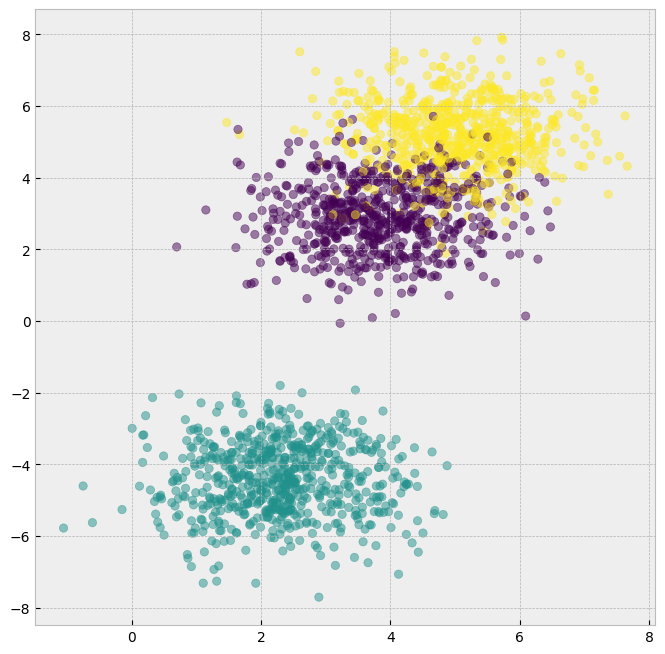

In [5]:
generator = example.BlobsClassificationExampleGenerator.create_uniform_centers(num_clusters=3, feature_size=2)
print(generator)
batch = generator.generate(batch_size=2000, rng=get_torch_generator(random_seed))

fig, ax = plt.subplots(figsize=(8, 8))
features = batch["feature"].data.numpy()
_ = ax.scatter(features[:, 0], features[:, 1], c=batch["target"].data.numpy(), alpha=0.5)

## Circles
[top](#Table-of-content)

CirclesClassificationExampleGenerator(shuffle=True, noise_std=0.02, factor=0.8, ratio=0.5)


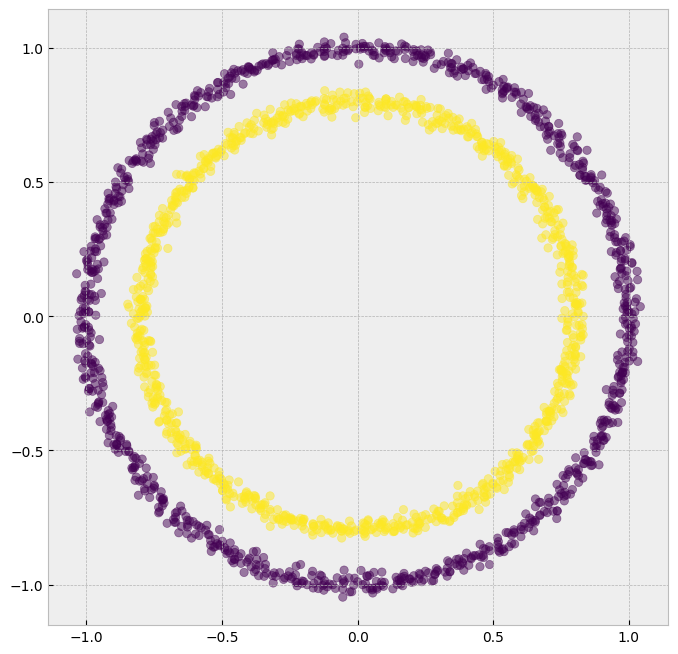

In [6]:
generator = example.CirclesClassification(noise_std=0.02)
print(generator)
batch = generator.generate(batch_size=2000, rng=get_torch_generator(random_seed))


fig, ax = plt.subplots(figsize=(8, 8))
features = batch["feature"].data.numpy()
_ = ax.scatter(features[:, 0], features[:, 1], c=batch["target"].data.numpy(), alpha=0.5)

## Hypercube
[top](#Table-of-content)

HypercubeClassificationExampleGenerator(num_classes=50, feature_size=64, noise_std=0.2)


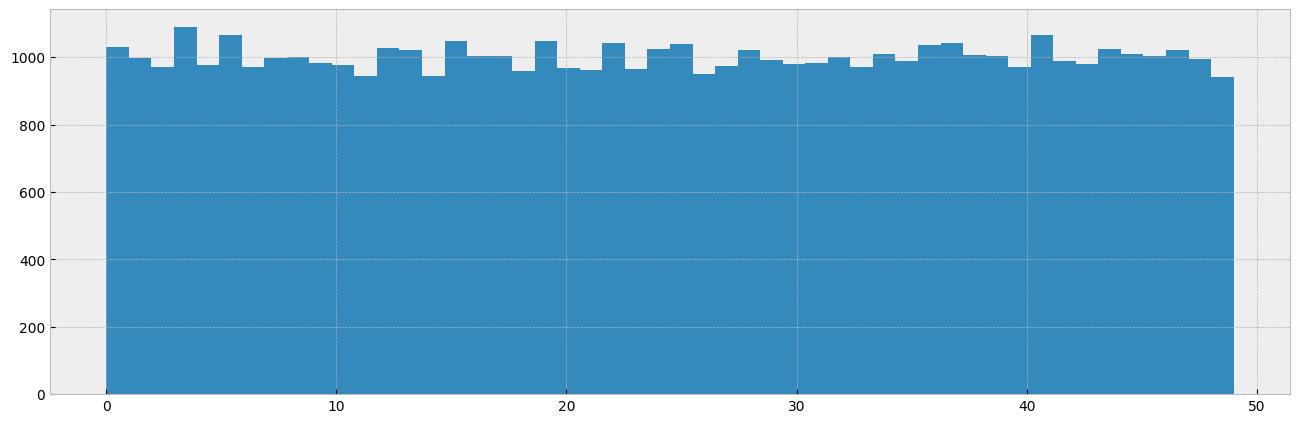

In [7]:
num_classes = 50
generator = example.HypercubeClassification(num_classes=num_classes, feature_size=64)
print(generator)
batch = generator.generate(batch_size=50000, rng=get_torch_generator(random_seed))

fig, ax = plt.subplots()
_ = ax.hist(batch["target"].data.numpy(), bins=num_classes)

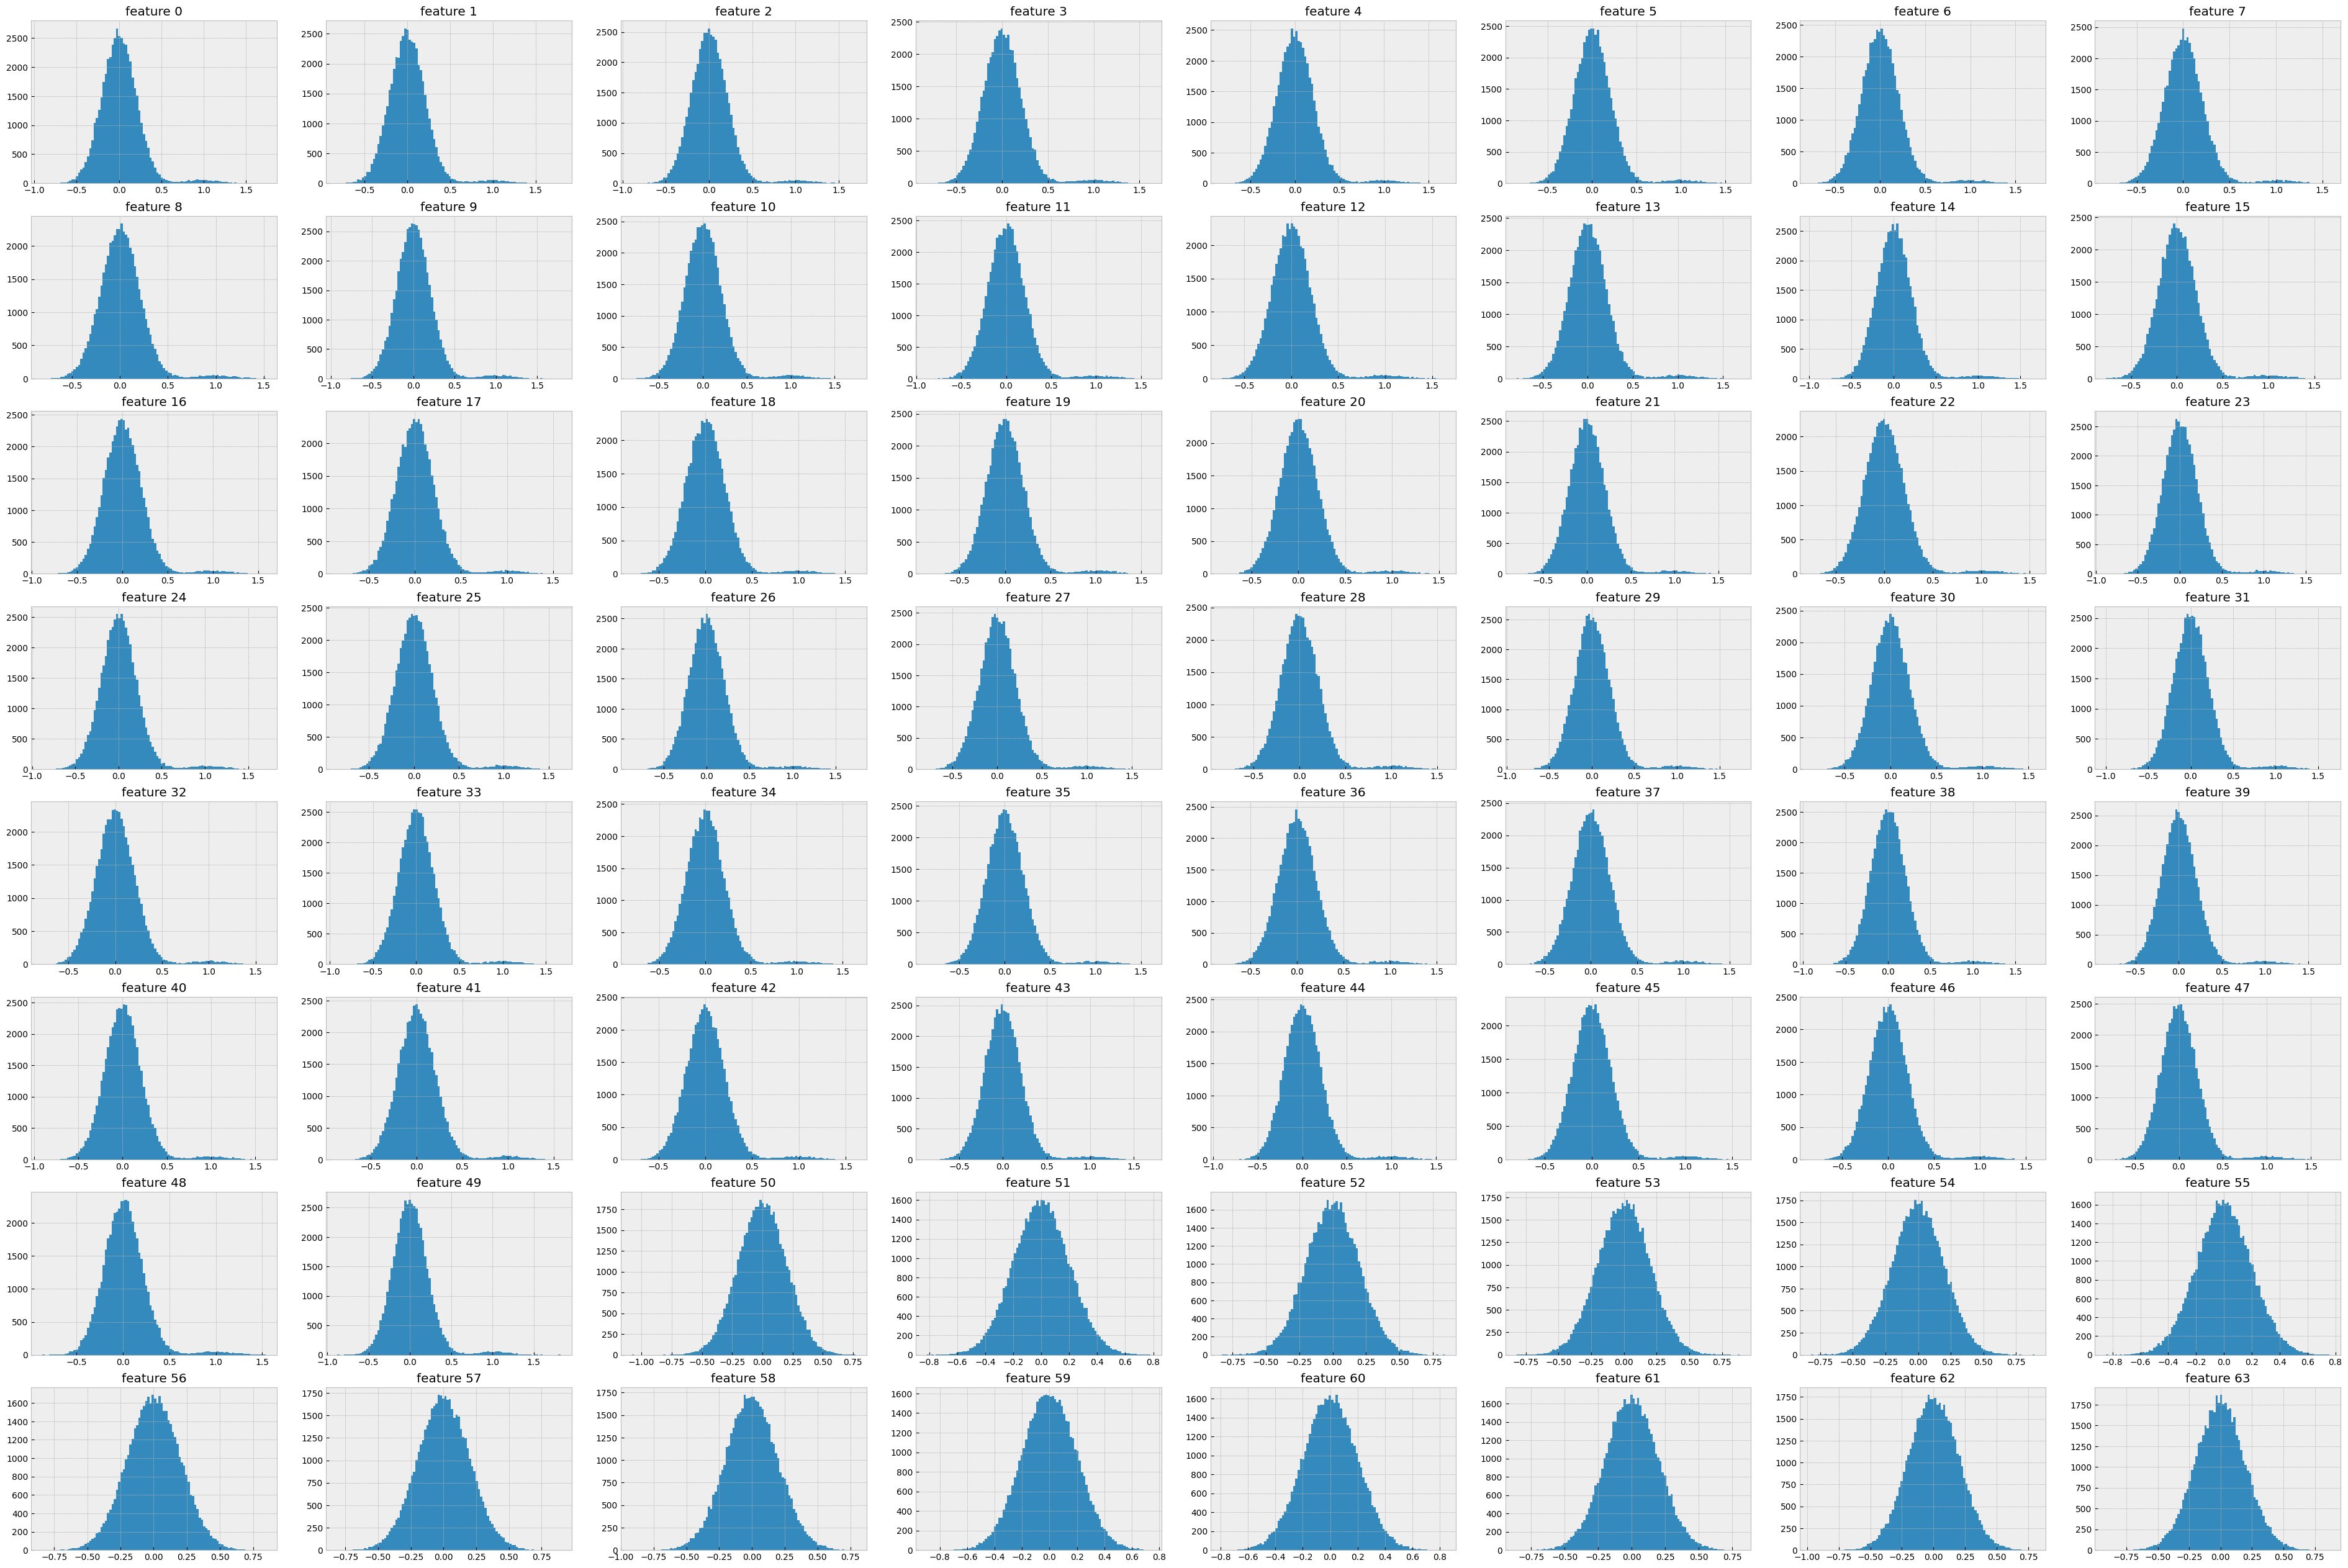

In [8]:
fig = hist_feature(batch["feature"].data, ncols=8, bins=100)

## Moons
[top](#Table-of-content)

MoonsClassificationExampleGenerator(shuffle=True, noise_std=0.02, ratio=0.5)


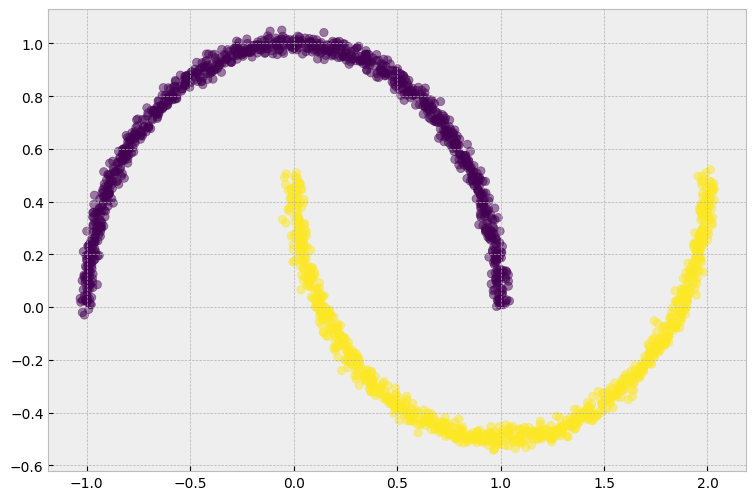

In [9]:
generator = example.MoonsClassification(noise_std=0.02)
print(generator)
batch = generator.generate(batch_size=2000, rng=get_torch_generator(random_seed))


fig, ax = plt.subplots(figsize=(9, 6))
features = batch["feature"].data.numpy()
_ = ax.scatter(features[:, 0], features[:, 1], c=batch["target"].data.numpy(), alpha=0.5)

# Regression
[top](#Table-of-content)

## Friedman1
[top](#Table-of-content)

Friedman1RegressionExampleGenerator(feature_size=10, noise_std=0.0)


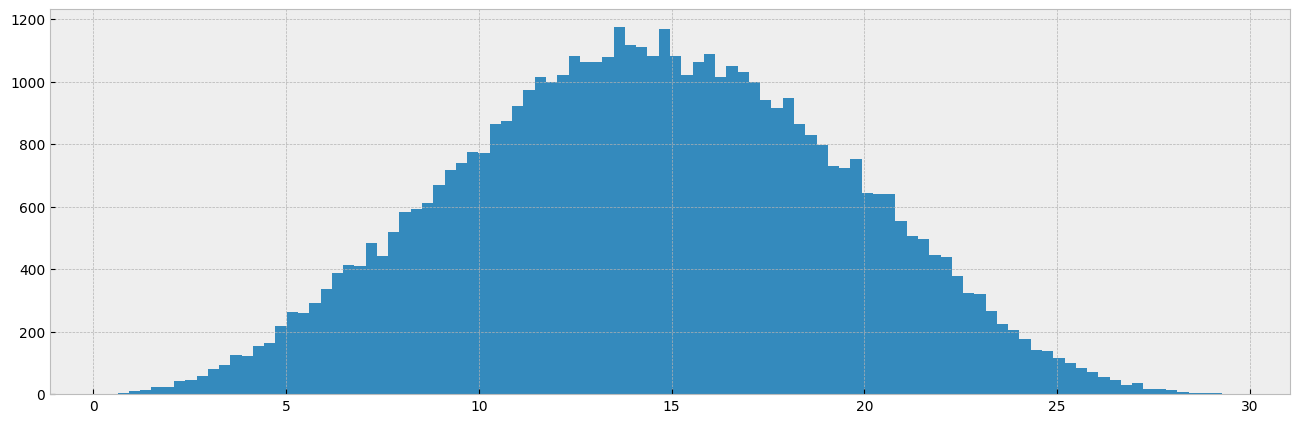

In [10]:
generator = example.Friedman1Regression()
print(generator)
batch = generator.generate(batch_size=50000, rng=get_torch_generator(random_seed))

fig, ax = plt.subplots()
_ = ax.hist(batch["target"].data.numpy(), bins=100)

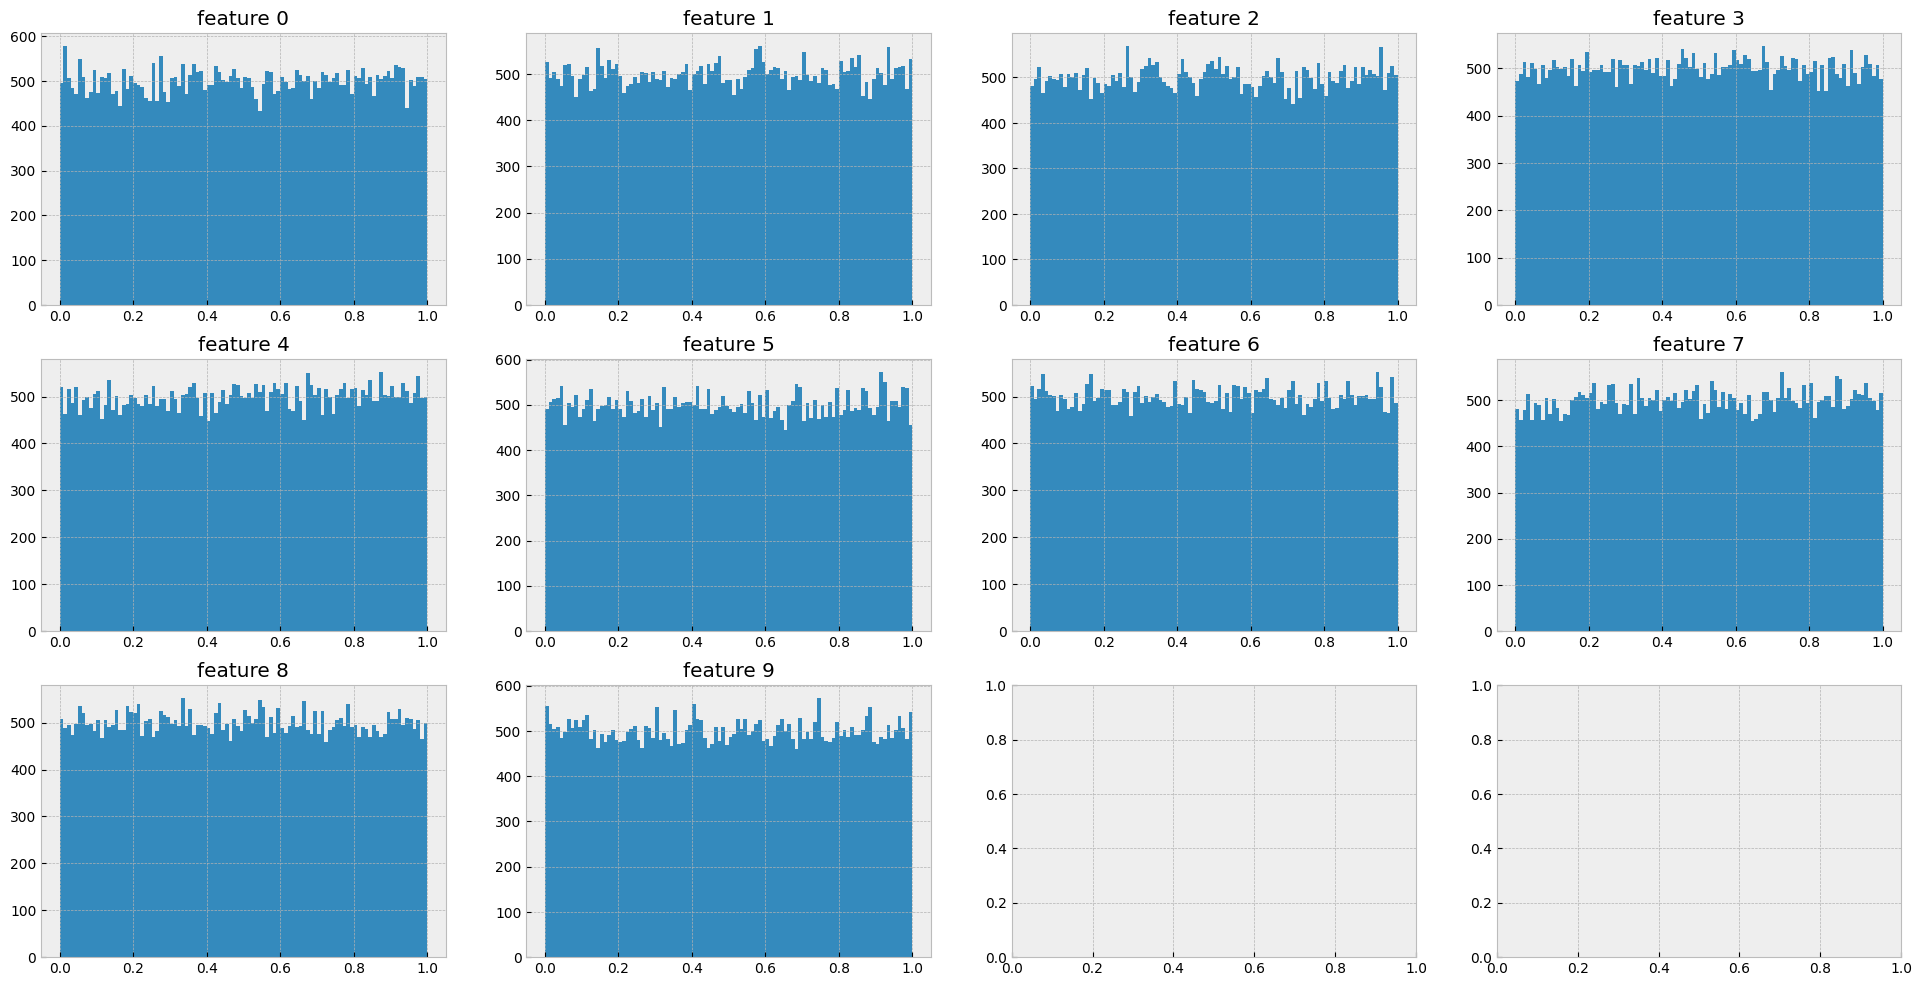

In [11]:
fig = hist_feature(batch["feature"].data, ncols=4, bins=100)

## Friedman2
[top](#Table-of-content)

Friedman2RegressionExampleGenerator(feature_size=4, noise_std=0.0)


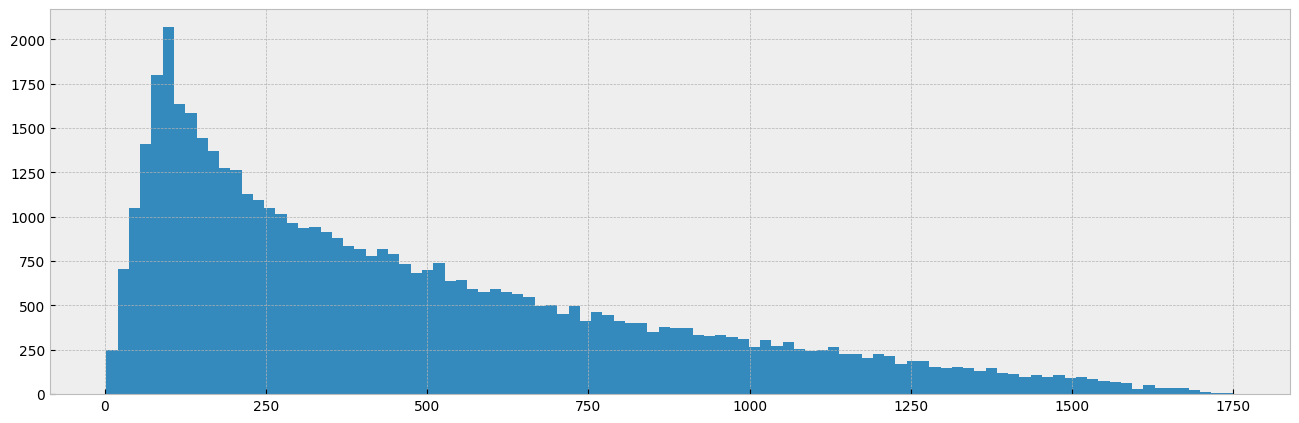

In [12]:
generator = example.Friedman2Regression()
print(generator)
batch = generator.generate(batch_size=50000, rng=get_torch_generator(random_seed))

fig, ax = plt.subplots()
_ = ax.hist(batch["target"].data.numpy(), bins=100)

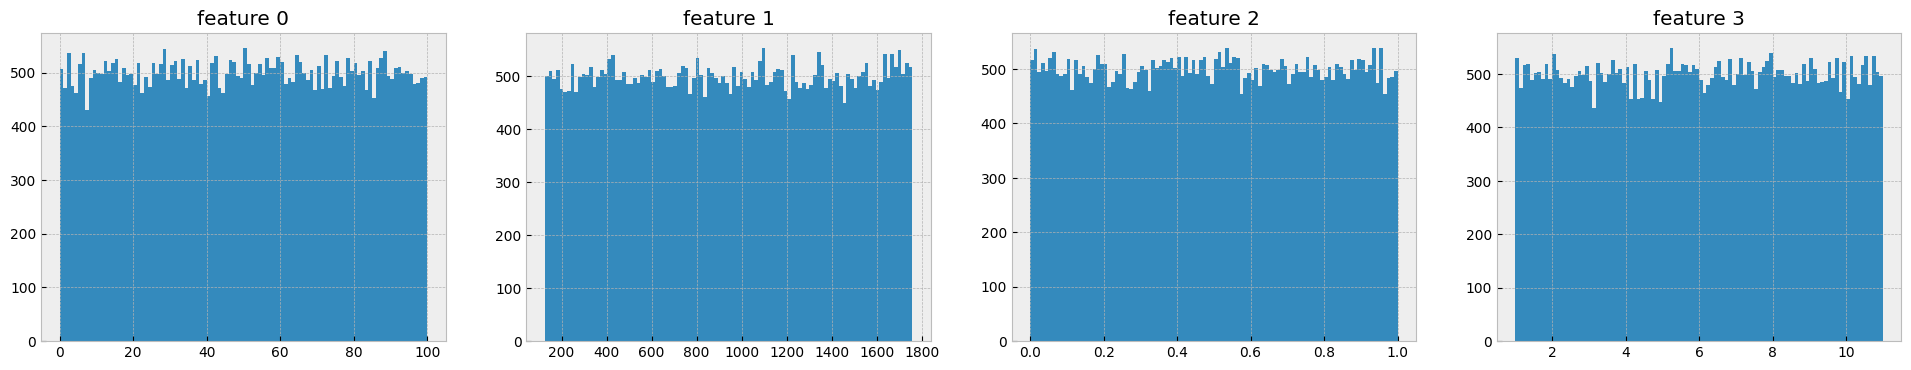

In [13]:
fig = hist_feature(batch["feature"].data, ncols=4, bins=100)

## Friedman3
[top](#Table-of-content)

Friedman3RegressionExampleGenerator(feature_size=4, noise_std=0.0)


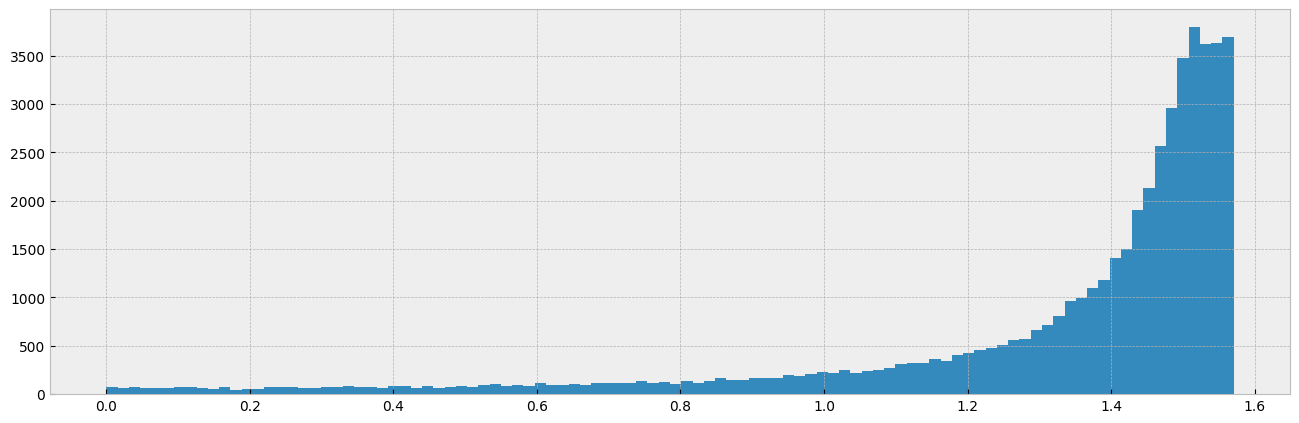

In [14]:
generator = example.Friedman3Regression()
print(generator)
batch = generator.generate(batch_size=50000, rng=get_torch_generator(random_seed))

fig, ax = plt.subplots()
_ = ax.hist(batch["target"].data.numpy(), bins=100)

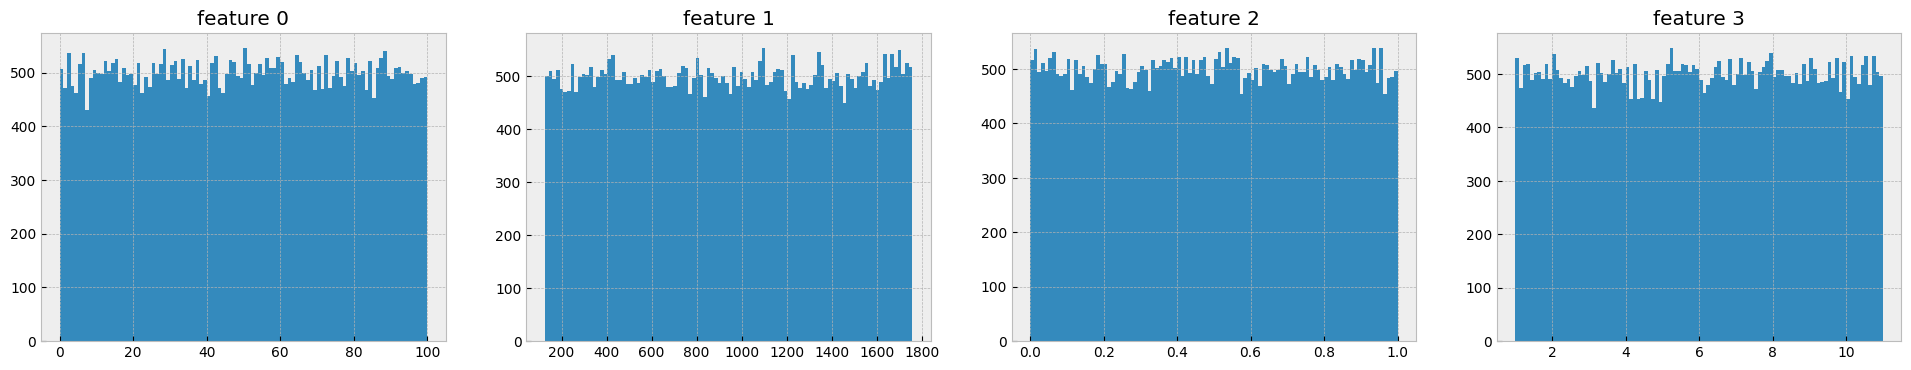

In [15]:
fig = hist_feature(batch["feature"].data, ncols=4, bins=100)

## Linear Regression
[top](#Table-of-content)

LinearRegressionExampleGenerator(feature_size=10, bias=0.0, noise_std=0.0)


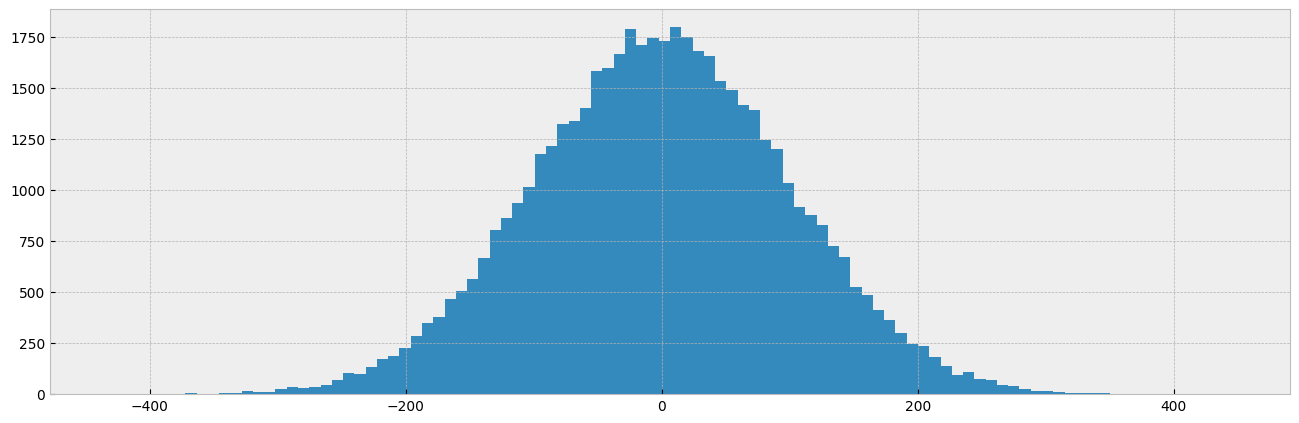

In [16]:
from startorch.example.regression import get_uniform_weights

weights = get_uniform_weights(feature_size=10, informative_feature_size=5)
generator = example.LinearRegression(weights=weights)
print(generator)
batch = generator.generate(batch_size=50000, rng=get_torch_generator(random_seed))

fig, ax = plt.subplots()
_ = ax.hist(batch["target"].data.numpy(), bins=100)

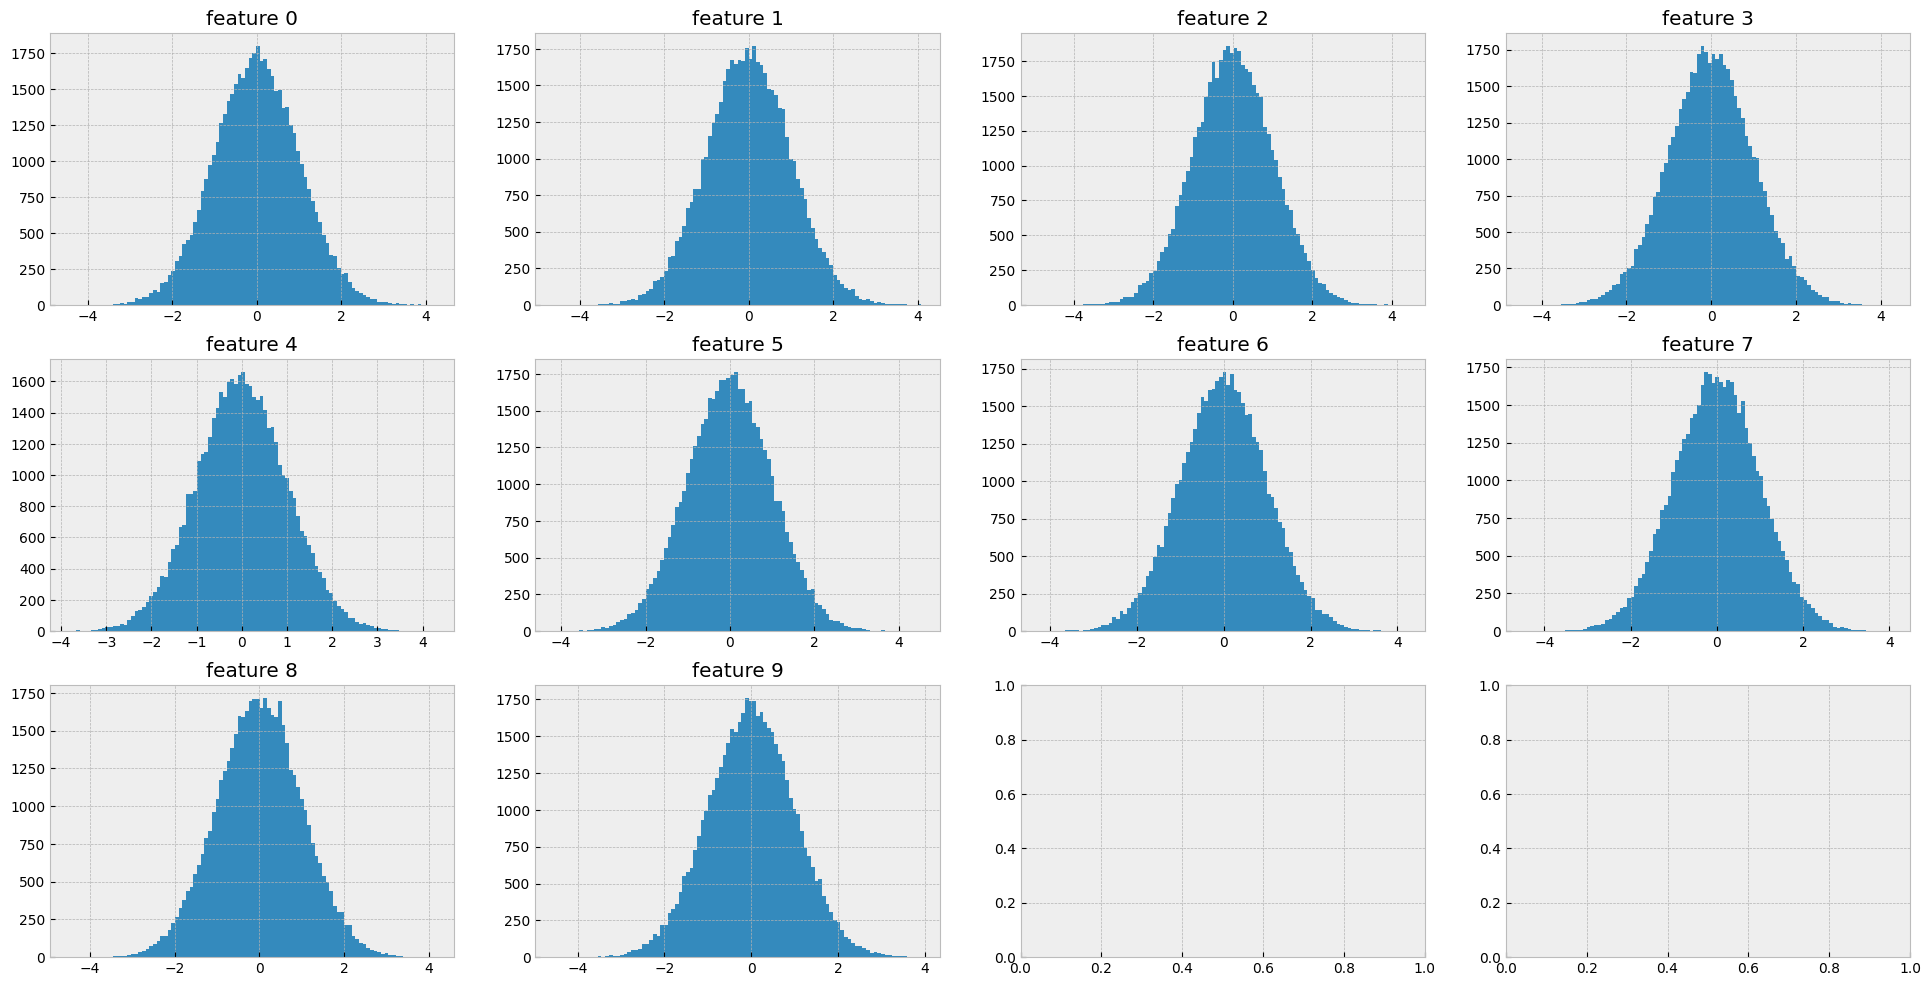

In [17]:
fig = hist_feature(batch["feature"].data, ncols=4, bins=100)

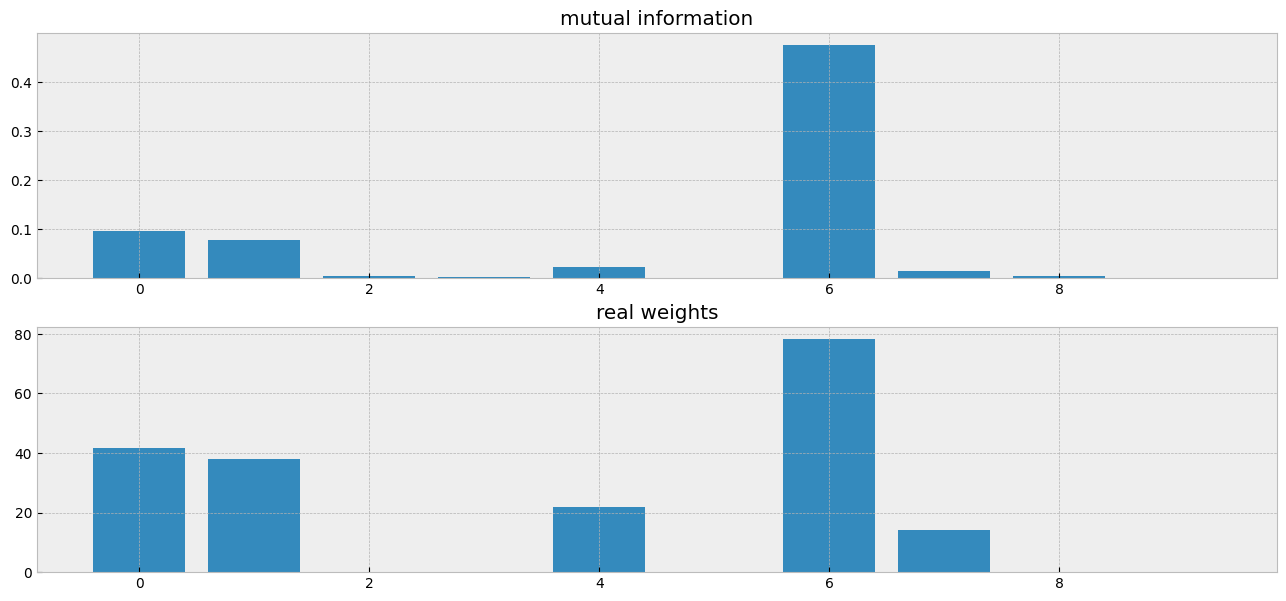

In [18]:
mi = mutual_info_regression(batch["feature"].data.numpy(), batch["target"].data.numpy())

fig, axes = plt.subplots(2, 1, figsize=(16, 7))
_ = axes[0].bar(list(range(mi.shape[0])), mi)
_ = axes[0].set_title("mutual information")
_ = axes[1].bar(list(range(mi.shape[0])), weights.flatten().numpy())
_ = axes[1].set_title("real weights")

# Manifold
[top](#Table-of-content)

## Swiss Roll
[top](#Table-of-content)

{'target': tensor([13.3664,  6.7151, 10.0836,  ..., 12.2893,  5.5861,  8.7990]), 'feature': tensor([[ 9.1848,  0.1611,  9.5011],
        [ 6.0715,  3.9543,  2.7455],
        [-8.1832,  8.6430, -5.9099],
        ...,
        [12.0390,  1.5079, -3.3872],
        [ 4.2537,  0.0814, -3.4823],
        [-7.0343,  8.6997,  5.2712]])}


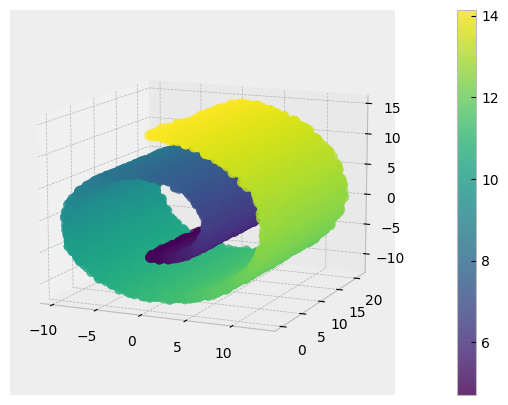

In [21]:
from startorch.example import make_swiss_roll

def plot_swiss_roll(data: dict[str, torch.Tensor]) -> None:
    r"""Generate the 3d plot of the swiss roll pattern.

    Args:
        data: The dictionary containing the data to plot.
            The dictionary is expected to contain the keys: ``'feature'`` and ``'target'``.
            The feature is a tensor of shape ``(batch size, 3)`` and target is a tensor of shape ``(batch size,)``
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    fig.add_axes(ax)
    features = data["feature"].numpy()
    targets = data["target"].numpy()
    im = ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=targets, s=50, alpha=0.8)
    ax.view_init(azim=-66, elev=12)
    fig.colorbar(im, orientation="vertical")

data = make_swiss_roll(10000, spin=1.5, noise_std=0.1, generator=get_torch_generator(random_seed))

plot_swiss_roll(data)

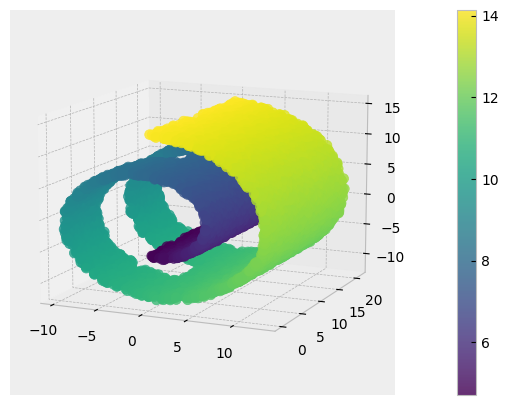

In [20]:
data = make_swiss_roll(10000, spin=1.5, noise_std=0.1, hole=True, generator=get_torch_generator(random_seed))

plot_swiss_roll(data)